<a href="https://colab.research.google.com/github/PoojithaNune/Covid19_Twitter_Analysis/blob/main/Copy_of_COVID_19_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Title : COVID-19 Sentiment Predictor: Analyzing Emotions in Tweets

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# Work Flow

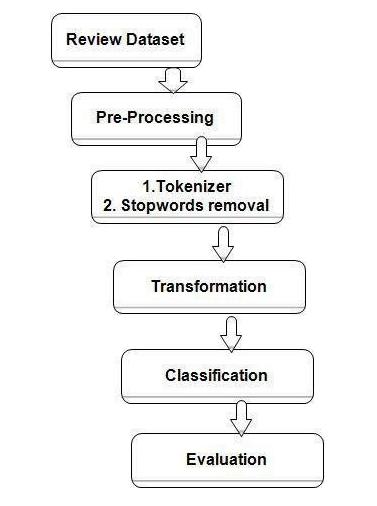

# Index

**1. Introduction**

**2. Lets Invite Some Libararies.**

**3. Exploratory Data Analysis./Reviwing Our Dataset**

**4. Data Preprocessing.**

*  Tokenization And Stopword Removal.

**5. Vectorization.**

**6. Classification- MULTICLASS AND BINARY.**

**7. Evaluation.**

**8. Challenges.**

**9. Conclusion.**

# Summary

Sentiment analysis is utilized to categorize opinions expressed in text, determining if the writer's attitude towards a specific topic is positive, negative, or neutral. COVID-19, declared a pandemic by the WHO on March 11, 2020, has led to the collection of tweets during this period. The analysis aims to provide valuable insights for policymaking and dispelling misconceptions by presenting relevant facts and information

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import numpy as np
import matplotlib


%matplotlib inline

In [106]:
working_dir_path = '/content/drive/MyDrive/Coronavirus Tweets (1) (1).csv'
df = pd.read_csv(working_dir_path,encoding = 'latin')

In [107]:
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


**Summary**

Understanding the First 5 rows of the Dataset

In [108]:
df.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41151,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


**Summary**

Understanding the last 5 rows of the dataset

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**Summary**

Information about the Dataset and it shows number of columns,non-null count and column dtype

In [110]:
df.shape

(41157, 6)

**Summary**

It represents the Rows and columns of the Dataset

In [111]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

**Summary**

columns of the Dataset

# Value_Counts of each Column

In [112]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [113]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [114]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [115]:
df['ScreenName'].value_counts()

48751    1
76243    1
76185    1
76186    1
76187    1
        ..
62471    1
62472    1
62473    1
62474    1
89907    1
Name: ScreenName, Length: 41157, dtype: int64

# Extremly Negative Sentiment Tweets

In [116]:
df[df['Sentiment']=='Extremely Negative'].head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative


In [117]:
df[df['Sentiment']=='Extremely Negative'].loc[20,'OriginalTweet']

'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'

**Summary**

Here we reading the Original tweet where index is 20

In [118]:
df[df['Sentiment']=='Extremely Negative'].loc[42,'OriginalTweet']

'CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No food ? in USA market due to coronavirus panic we gonna die from starvation #CoronavirusOutbreak #coronavirus #houston #nofood #Notoiletpaper #NoHandShakes #nohandsanitizer #COVID19 #pandemic #totallockdown #COVID2019usa #walmart https://t.co/ztN3iMkgpD'

In [119]:
df[df['Sentiment']=='Extremely Negative'].loc[41153,'OriginalTweet']

'Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?'

In [120]:
df[df['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative
...,...,...,...,...,...,...
41127,44926,89878,NaN,14-04-2020,Today at the grocery store I saw someone getti...,Negative
41131,44930,89882,"Accra, Ghana",14-04-2020,In every human affliction there are gainers a...,Negative
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative


In [121]:
df[df['Sentiment']=='Negative'].loc[41149,'OriginalTweet']

'Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .'

# Neutral Sentiment Tweets

In [122]:
df[df['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [123]:
df[df['Sentiment']=='Neutral'].loc[17,'OriginalTweet']

'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'

In [124]:
df[df['Sentiment']=='Neutral'].loc[16,'OriginalTweet']

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

# Positive Sentiment Tweets

In [125]:
df[df['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive


In [126]:
df[df['Sentiment']=='Positive'].loc[1,'OriginalTweet']

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [127]:
df[df['Sentiment']=='Positive'].loc[6,'OriginalTweet']

'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'

# Extremly Positive Tweets

In [128]:
df[df['Sentiment']=='Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [129]:
df[df['Sentiment']=='Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [130]:
df[df['Sentiment']=='Extremely Positive'].loc[22,'OriginalTweet']

'We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #iptvnew #iptv2020 #Adult'

In [131]:
pd.isnull(df["Sentiment"])

0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

**Checking Null values**

In [132]:
null_percentages = df.isnull().sum() / len(df) * 100
null_percentages

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

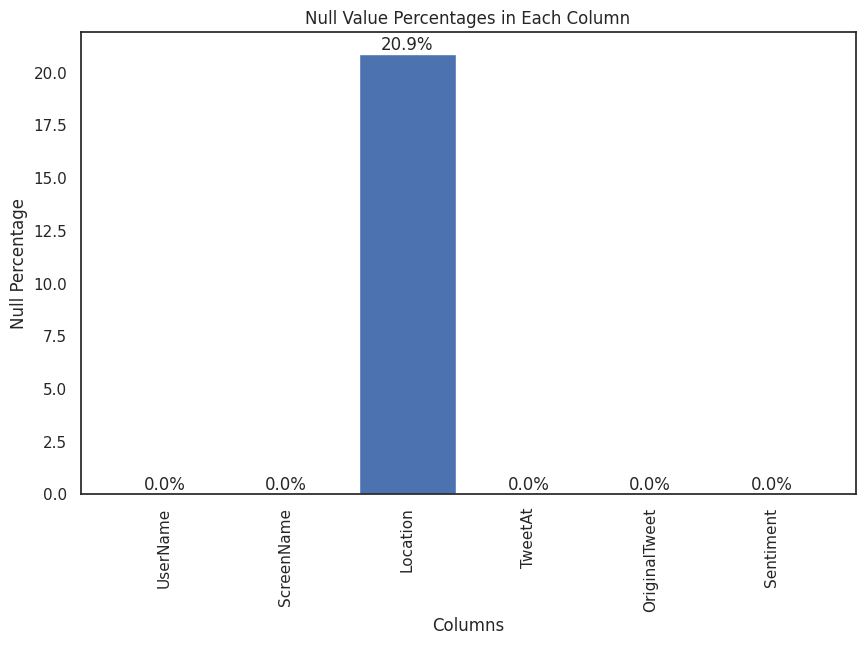

In [133]:
import matplotlib.pyplot as plt

null_percentages = df.isnull().sum() / len(df) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(null_percentages.index, null_percentages.values)
plt.xlabel('Columns')
plt.ylabel('Null Percentage')
plt.title('Null Value Percentages in Each Column')
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


**Summary**

This Bar graph represents null values of Each column

Location column has the 20% null values.

# Unique Values In Each Feature Coulmn

In [134]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in UserName: [ 3799  3800  3801 ... 44953 44954 44955]
Unique values in ScreenName: [48751 48752 48753 ... 89905 89906 89907]
Unique values in Location: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
Unique values in TweetAt: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
Unique values in OriginalTweet: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping acc

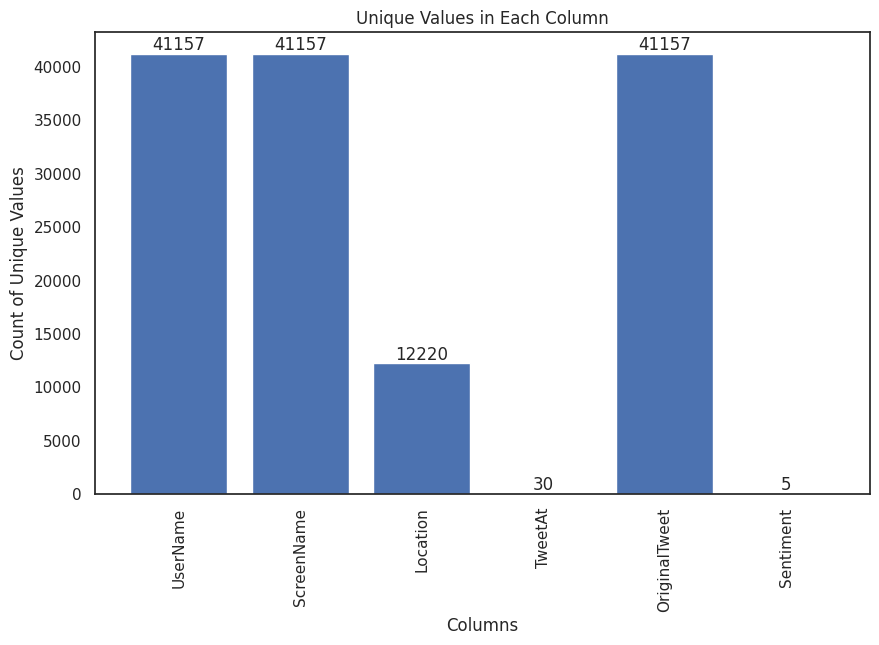

In [135]:
import matplotlib.pyplot as plt

unique_value_counts = df.nunique()

plt.figure(figsize=(10, 6))
bars = plt.bar(unique_value_counts.index, unique_value_counts.values)
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.title('Unique Values in Each Column')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

# Plot Of Top 15 Locations Of Tweet.

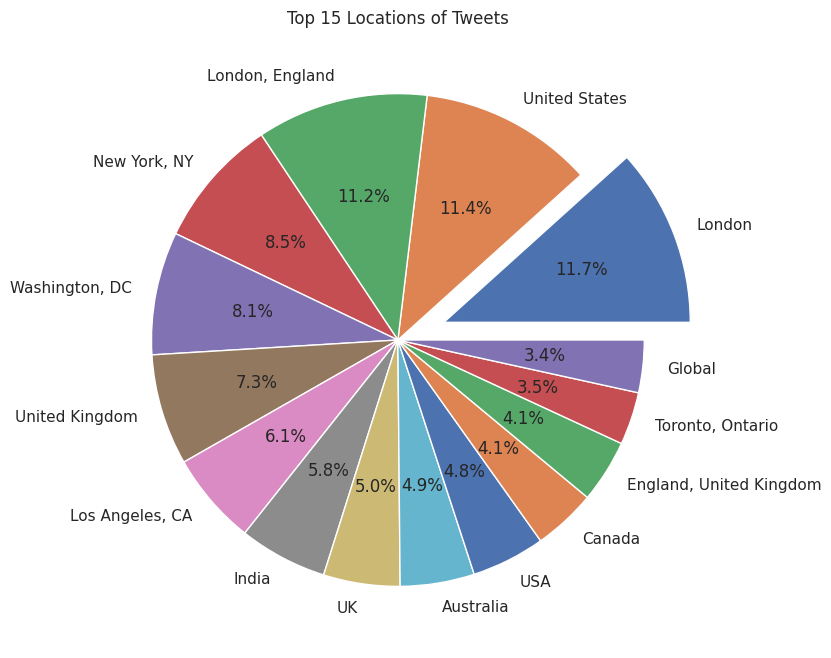

In [136]:
top_locations = df['Location'].value_counts().head(15)

explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Specify the explode values for each wedge

plt.figure(figsize=(8, 8))
plt.pie(top_locations.values, labels=top_locations.index, explode=explode, autopct='%1.1f%%')
plt.title('Top 15 Locations of Tweets')
plt.show()

**Summary**

This pie plot represents the top 15 locations of Tweet

From this plot from London has highest tweets percentage

Globely have the lowest percentage

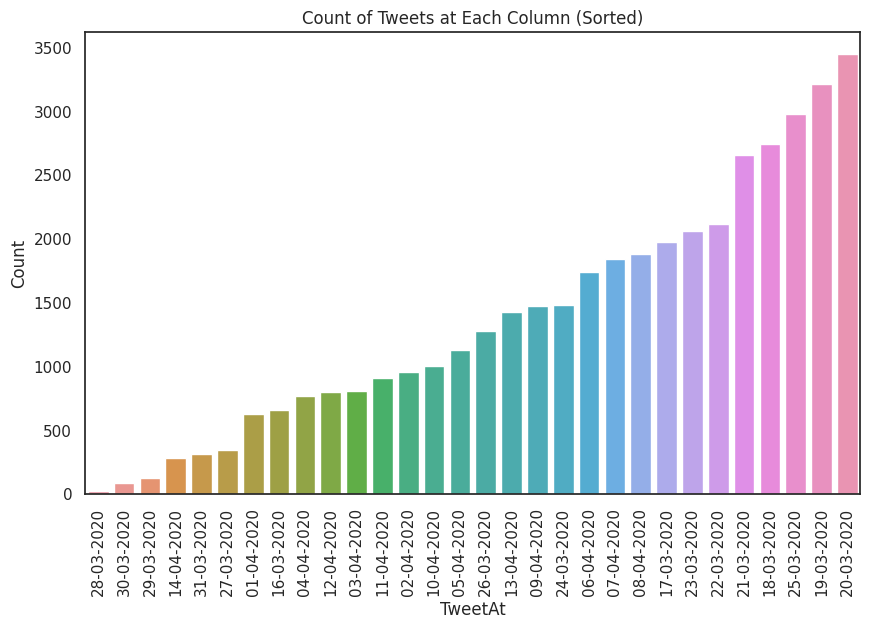

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

column_counts = df['TweetAt'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TweetAt', order=column_counts.index)
plt.xlabel('TweetAt')
plt.ylabel('Count')
plt.title('Count of Tweets at Each Column (Sorted)')
plt.xticks(rotation=90)
plt.show()



**Summary**


This count plot shows that which date have highest tweets

this plot represents the 20-03-2020 date has the highest tweets

28-03-2020 date has the lowest tweets


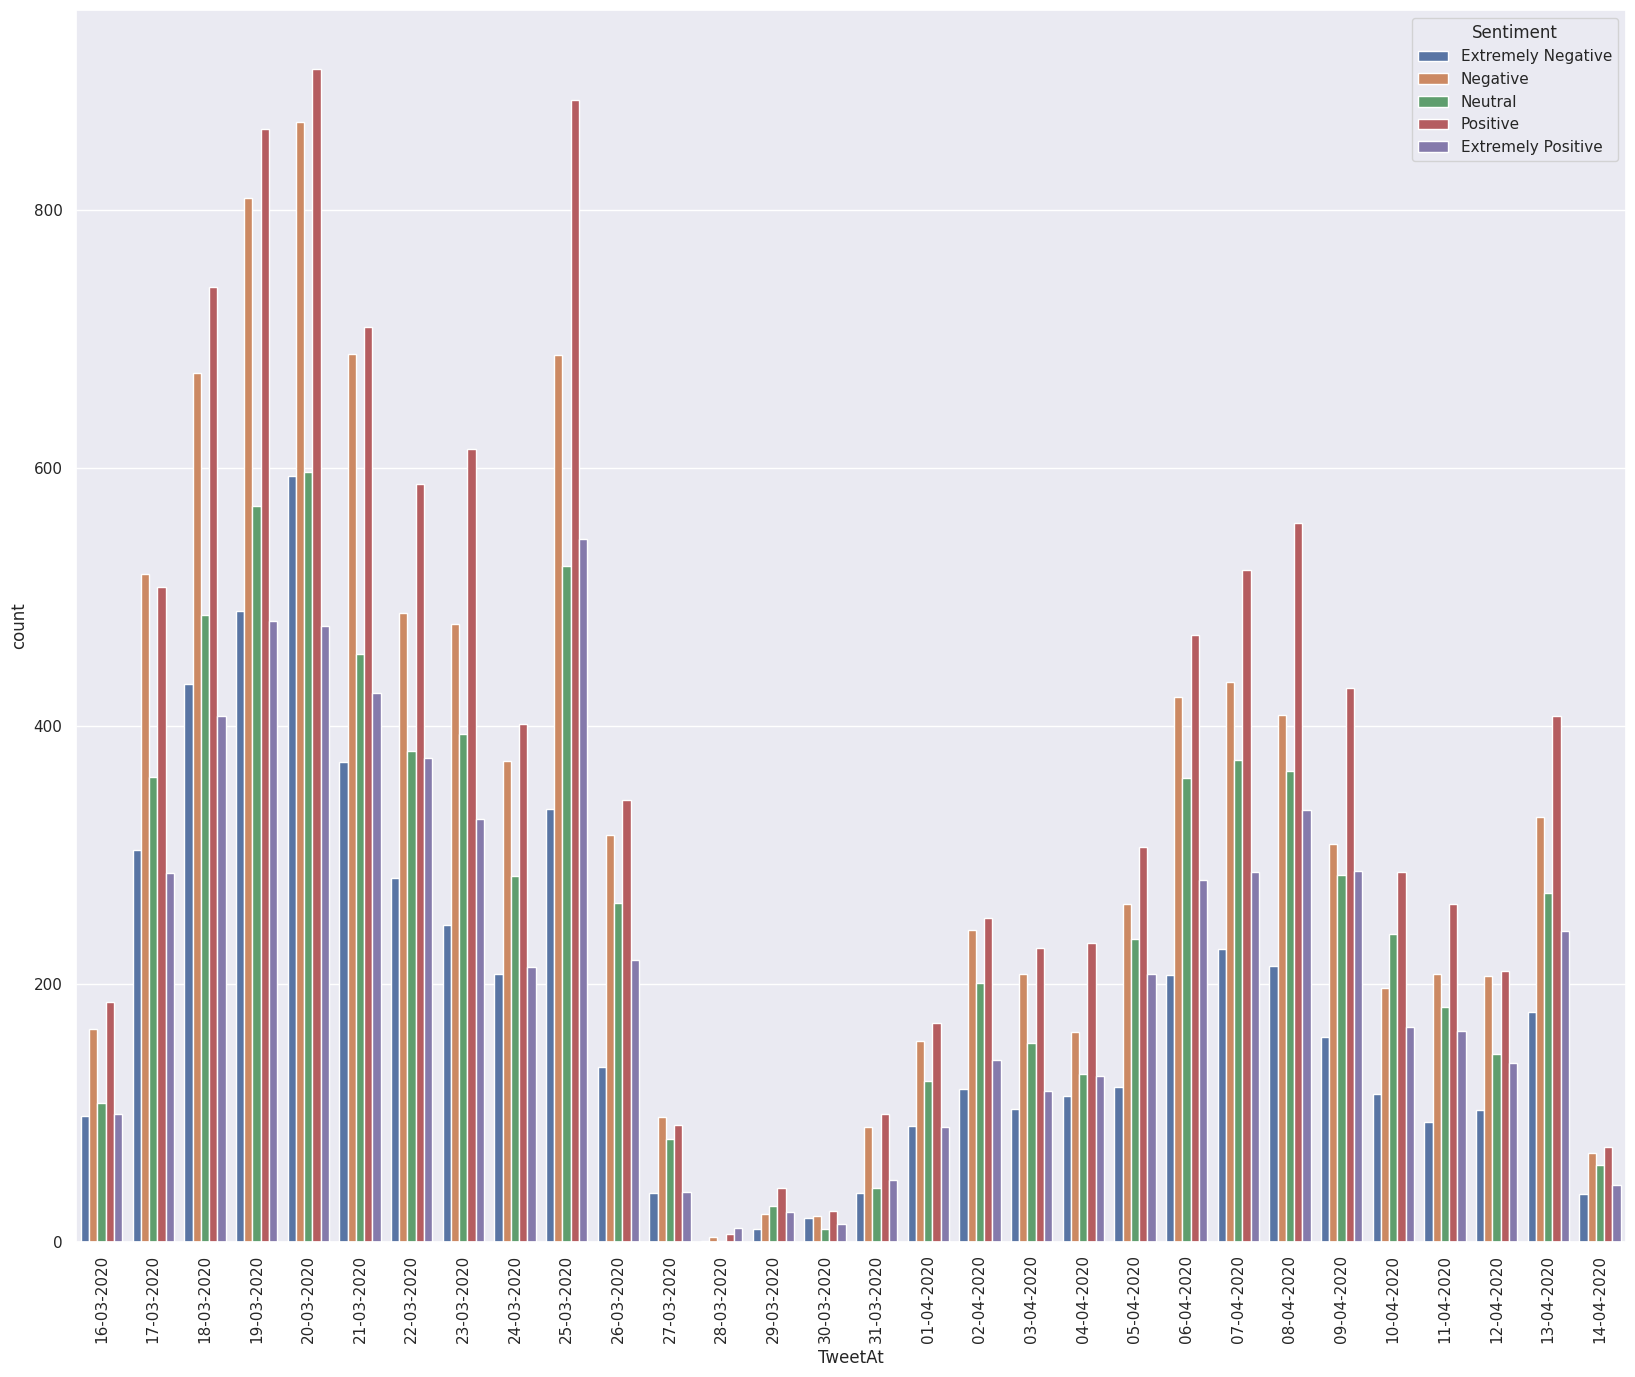

In [138]:
sns.set(rc={'figure.figsize':(20,16)})
sns.countplot(data=df, x='TweetAt', hue='Sentiment', hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.xticks(rotation=90)
plt.show()


**Summary**

This Count plot shows that which date has higest sentments

20-03-2020 has the higest sentiment analysis

In [139]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [140]:
Top_Location_Of_tweet.head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [141]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


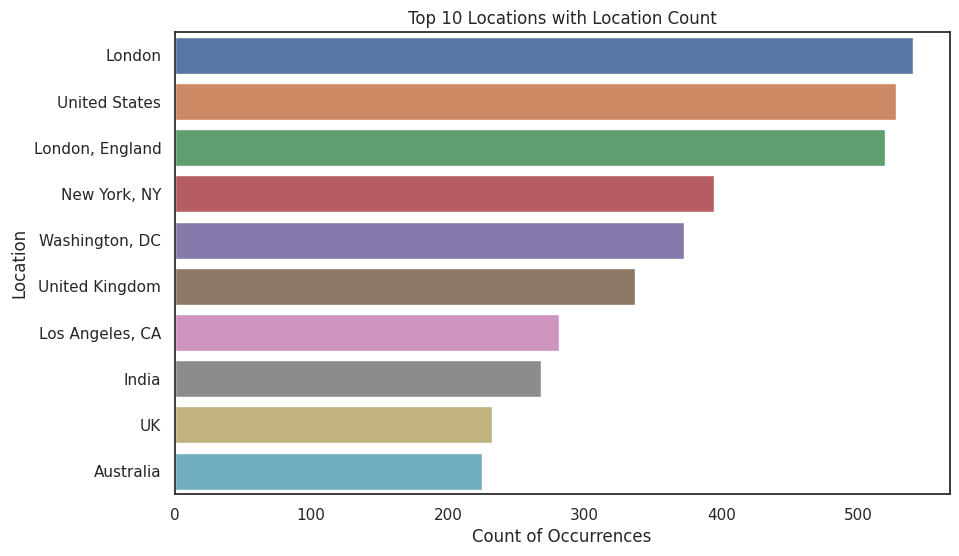

In [142]:
top_10_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Location', order=top_10_locations.index)
plt.xlabel('Count of Occurrences')
plt.ylabel('Location')
plt.title('Top 10 Locations with Location Count')
plt.show()


**Summary**

This Bar plot shows that howmany tweets from the top 15 locations

From London location we have a 540 tweets and this is highest

From Australia location we have 225 tweets and this is lowest


# Sentiment Countplot

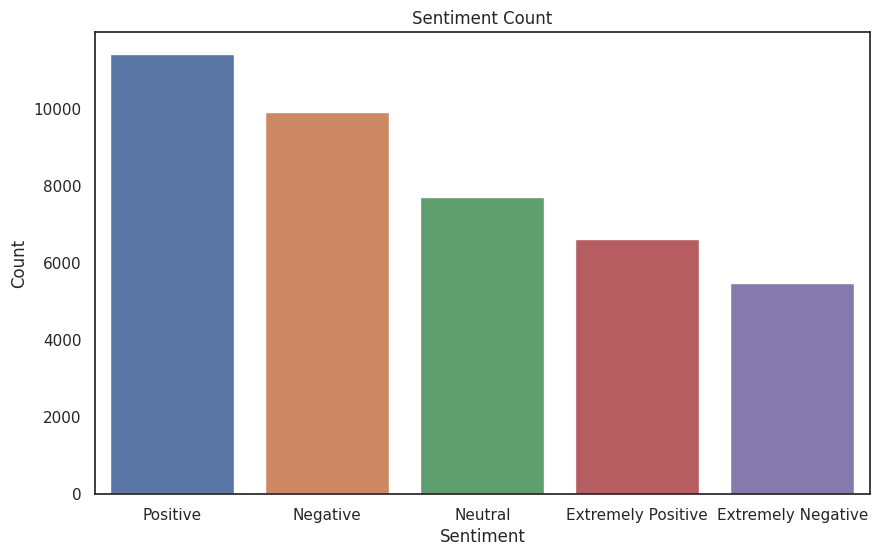

In [143]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count')
plt.show()


**Summary**

This Bar graph represents which is the higest sentiment from all users

By this Bar graph the highest sentiment frol the users is Positive

Second highest sentiment is Negative

Least sentiment is Extremly Negative

In [144]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

# Data Preprocessing

The preprocessing of the text data is an essential step as it makes the raw text ready for mining.

The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

As mentioned earlier, the tweets contain lots of twitter handles (@user). We will remove all these twitter handles from the data as they don’t convey much information.

We have analyzed that most of the tweets are like #coronavirus #covid-19 and this tweets are almost present in all the sentiments. So there is no use of keeping these hashtags in text. It will make the data noisy and which will affect accuracy of model.

We are having twitter links in the data which are not useful for our
Model. It will make our data noisy.

As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles,links and hashtags.

Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc.To remove stop words from a sentence, you can divide your text into words and then remove the word if it exists in the list of stop words provided by NLTK.

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “ed”, “s” etc) from a word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms.

In tokenization we convert group of sentence into token . It is also called text segmentation or lexical analysis. It is basically splitting data into small chunk of words.
Tokenization in python can be done by python NLTK library’s word_tokenize() function.


**A) Removing @user**

In [145]:
import re

In [146]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [147]:
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

In [148]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


**REMOVED HTTP AND URLS FROM TWEET**

In [149]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [150]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


**B) Removing Punctuations, Numbers, and Special Characters**

In [151]:
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

<ipython-input-151-15d0e2cedd3f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')


In [152]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...


# C) Removing Short Words

In [153]:
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [154]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the #COVID outbreak N...


# **D) Tokenization**

In [155]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [156]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the #COVID outbreak N...


**E) Stemming**

In [157]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [158]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the #COVID outbreak N...


In [159]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [160]:
df['Tweet']  = tokenized_tweet

In [161]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the onli one which empti pleas ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi supermarket dure the #covid outbreak not...


# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [162]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the onli one which empti pleas ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi supermarket dure the #covid outbreak not...


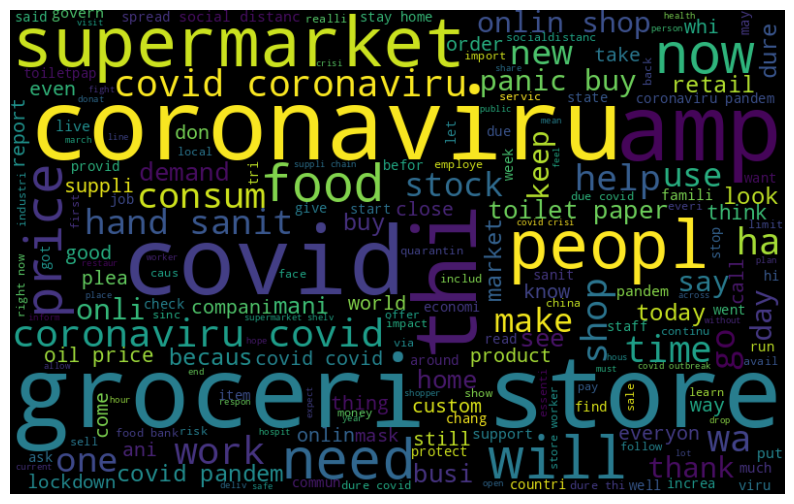

In [163]:
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Summary**

This Word cloud Plot shows that Which word freqently repeated.

Here Corona virus repeated more times in this column

groceristore word also repeated more times

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Summary**

This Word Cloud plot represents which word repeated more times in this column

In this column Covid repeted More times.

After Covid word, Coronavirus repeated more times

In [ ]:
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Summary**

This Word cloud plot represents the which word repeated more times in this column.

In this column Coronavirus word mostly repeated,and COVID word als repeted more times


In [ ]:
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Summary**

This word plot shows in this Extremely Negative column COVID word repeated more times.

Coronavirus word also repeated more times in this column

In [ ]:
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Summary**

This Word cloud plot represents in this Negative column Coronavirus word repeated more times.

Supermarket word repeated more times after coronavirus word

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Summary**

This Word cloud plot represents int this column Coronavirus repeated more times.

COVID and SuperMarket words repeated more times after Coronavirus column


**D) Understanding the impact of Hashtags on tweets sentiment**

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

In [ ]:
print(HT_Extremely_Positive)

In [ ]:
print(HT_Positive)

In [ ]:
print(HT_Neutral)

In [ ]:
print(HT_Negative)

In [ ]:
print(HT_Extremely_Negative)

# HashTags of Each Column

In [ ]:
import nltk

# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(HT_Extremely_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Extremely Negative hashtags
a = nltk.FreqDist(HT_Extremely_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [ ]:
new_df = df[['Tweet','Sentiment']]

In [ ]:
new_df.head()

In [ ]:
df['Sentiment'].value_counts()

**Removing Stopwords**

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
new_df.head(6)

In [ ]:
new_df.shape

In [ ]:
new_df.isnull().sum()

In [ ]:
new_df.head(7)

# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

# Use Of Counter Vectorizer For Multi Class Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

# Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train, y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid, NB_prediction)
print("Training accuracy Score   : ", naiveByes_clf.score(X_train, y_train))
print("Validation accuracy Score : ", NB_accuracy)
print(classification_report(NB_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, NB_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

Training Accuracy score of this model is : 0.69 testing accuracy is : 0.47

Precision: It measures the proportion of correctly predicted instances among the predicted instances for a particular class. The weighted average precision across all classes is 0.52.

Recall: It calculates the proportion of correctly predicted instances among the actual instances of a specific class. The weighted average recall across all classes is 0.48.

F1-score: It is the harmonic mean of precision and recall and provides a balanced measure between the two. The weighted average F1-score across all classes is 0.48.

Support: It indicates the number of instances in each class.

Accuracy: It represents the overall accuracy of the model, which is 0.48, indicating that approximately 48% of the instances were correctly classified.


# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sgd_clf = SGDClassifier(loss='hinge', penalty='l2', random_state=0)
sgd_clf.fit(X_train, y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid, sgd_prediction)
print("Training accuracy Score   : ", sgd_clf.score(X_train, y_train))
print("Validation accuracy Score : ", sgd_accuracy)
print(classification_report(sgd_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, sgd_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

Training Accuracy: The accuracy score on the training set is 0.8289, indicating that approximately 82.89% of the instances in the training set were correctly classified.

Validation Accuracy: The accuracy score on the validation set is 0.5726, suggesting that around 57.26% of the instances in the validation set were correctly classified.

Precision, Recall, and F1-score: These metrics measure the performance of the model for each class. The precision represents the proportion of correctly predicted instances among the predicted instances, recall represents the proportion of correctly predicted instances among the actual instances, and the F1-score is the harmonic mean of precision and recall. The weighted average precision, recall, and F1-score across all classes are 0.59, 0.57, and 0.58, respectively.

Support: It indicates the number of instances in each class.

Accuracy: It represents the overall accuracy of the model, which is 0.57, indicating that approximately 57% of the instances were correctly classified

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_prediction)
print("Training accuracy Score   : ", rf_clf.score(X_train, y_train))
print("Validation accuracy Score : ", rf_accuracy)
print(classification_report(rf_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, rf_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 99.6% and a validation accuracy score of 56.6%. It was evaluated using precision, recall, and f1-score metrics for five sentiment categories: Extremely Negative, Extremely Positive, Negative, Neutral, and Positive.

The model achieved moderate precision, recall, and f1-score for the sentiment categories. The weighted average f1-score, which considers class imbalance, is 0.57.

# Support vector machine( For Multiclass Classification)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_prediction)
print("Training accuracy Score   : ", rf_clf.score(X_train, y_train))
print("Validation accuracy Score : ", rf_accuracy)
print(classification_report(rf_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, rf_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 99.6% and a validation accuracy score of 56.0%. It was evaluated using precision, recall, and f1-score metrics for five sentiment categories: Extremely Negative, Extremely Positive, Negative, Neutral, and Positive.

The model achieved relatively low precision, recall, and f1-score for the sentiment categories. The weighted average f1-score, which considers class imbalance, is 0.57.

# Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid, logreg_prediction)
print("Training accuracy Score   : ", logreg.score(X_train, y_train))
print("Validation accuracy Score : ", logreg_accuracy)
print(classification_report(logreg_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, logreg_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 88.6% and a validation accuracy score of 61.8%. It was evaluated using precision, recall, and f1-score metrics for five sentiment categories: Extremely Negative, Extremely Positive, Negative, Neutral, and Positive.

The model achieved moderate precision, recall, and f1-score for the sentiment categories. The weighted average f1-score, which considers class imbalance, is 0.62.

# CATBOOST MODEL (For Multiclass Classification)

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid, catboost_prediction)
print("Training accuracy Score   : ", clf2.score(X_train, y_train))
print("Validation accuracy Score : ", catboost_accuracy)
print(classification_report(catboost_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, catboost_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 67.0% and a validation accuracy score of 62.0%. It was evaluated using precision, recall, and f1-score metrics for five sentiment categories: Extremely Negative, Extremely Positive, Negative, Neutral, and Positive.

The model achieved moderate precision, recall, and f1-score for the sentiment categories. The weighted average f1-score, which considers class imbalance, is 0.62.

In summary, the model shows fair performance with moderate precision, recall, and f1-scores for each sentiment category. It can accurately classify instances in the validation set around 62.0% of the time, with reasonably balanced performance across the different sentiment categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the target variable
label_encoder.fit(y_train)

# Encode the target variable using the fitted encoder
y_train_encoded = label_encoder.transform(y_train)

# Now you can use y_train_encoded in your XGBoost model fitting
xgboost_clf.fit(X_train, y_train_encoded)

# Similarly, you need to encode the target variable for validation or testing data
y_valid_encoded = label_encoder.transform(y_valid)
xgb_prediction = xgboost_clf.predict(X_valid)


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the target variable
label_encoder.fit(y_train)

# Encode the target variable using the fitted encoder
y_train_encoded = label_encoder.transform(y_train)

# Create an instance of XGBoost classifier
xgboost_clf = xgb.XGBClassifier()

# Fit the classifier on the training data
xgboost_clf.fit(X_train, y_train_encoded)

# Encode the target variable for validation or testing data
y_valid_encoded = label_encoder.transform(y_valid)

# Make predictions on the validation data
xgb_prediction = xgboost_clf.predict(X_valid)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert the predicted labels back to their original categorical form
y_valid_predicted = label_encoder.inverse_transform(xgb_prediction)

# Convert the encoded validation labels back to their original categorical form
y_valid_original = label_encoder.inverse_transform(y_valid_encoded)

# Calculate and print accuracy
accuracy = accuracy_score(y_valid_original, y_valid_predicted)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and F1-score
precision = precision_score(y_valid_original, y_valid_predicted, average='weighted')
recall = recall_score(y_valid_original, y_valid_predicted, average='weighted')
f1 = f1_score(y_valid_original, y_valid_predicted, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print the confusion matrix
confusion_mat = confusion_matrix(y_valid_original, y_valid_predicted)
print("Confusion Matrix:")
print(confusion_mat)

# Print the classification report
classification_rep = classification_report(y_valid_original, y_valid_predicted)
print("Classification Report:")
print(classification_rep)


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**


The model you evaluated has an accuracy of 59.2%. The precision, recall, and F1-score are 60.2%, 59.2%, and 58.9% respectively.

The confusion matrix shows the following distribution:

Extremely Negative: 560 instances were classified correctly, 12 were misclassified as Extremely Positive, 365 as Negative, 97 as Neutral, and 62 as Positive.
Extremely Positive: 714 instances were classified correctly, 46 were misclassified as Extremely Negative, 78 as Negative, and 474 as Positive.
Negative: 967 instances were classified correctly, 211 were misclassified as Extremely Negative, 40 as Extremely Positive, 384 as Neutral, and 381 as Positive.
Neutral: 1230 instances were classified correctly, 14 were misclassified as Extremely Negative, 19 as Extremely Positive, 71 as Negative, and 209 as Positive.
Positive: 1404 instances were classified correctly, 55 were misclassified as Extremely Negative, 208 as Extremely Positive, 236 as Negative, and 382 as Neutral.

#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [ ]:
new_df.head()

In [ ]:
CATBOOST = new_df[['Tweet','Sentiment']]

In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Positive',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Positive',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Neutral',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Negative',0)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Negative',0)

In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST['Sentiment'].value_counts()

In [ ]:
X = CATBOOST.drop('Sentiment', axis=1)
y = CATBOOST.Sentiment

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
CATBOOST['Tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
CATBOOST.head(2)

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.2,random_state=0,stratify = CATBOOST.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

# USING COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train, y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid, NB_prediction)
print("Training accuracy Score   : ", naiveByes_clf.score(X_train, y_train))
print("Validation accuracy Score : ", NB_accuracy)
print(classification_report(NB_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, NB_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 85.9% and a validation accuracy score of 79.2%. It was evaluated using precision, recall, and f1-score metrics for two classes (0 and 1). For class 0, the precision is 0.69, recall is 0.74, and f1-score is 0.71, based on a support of 2899 instances. For class 1, the precision is 0.85, recall is 0.82, and f1-score is 0.84, based on a support of 5333 instances.

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_prediction)
print("Training accuracy Score   : ", rf_clf.score(X_train, y_train))
print("Validation accuracy Score : ", rf_accuracy)
print(classification_report(rf_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, rf_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 99.9% and a validation accuracy score of 83.2%. It was evaluated using precision, recall, and f1-score metrics for two classes (0 and 1). For class 0, the precision is 0.70, recall is 0.83, and f1-score is 0.76, based on a support of 2614 instances. For class 1, the precision is 0.91, recall is 0.84, and f1-score is 0.87, based on a support of 5618 instances.

# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid, logreg_prediction)
print("Training accuracy Score   : ", logreg.score(X_train, y_train))
print("Validation accuracy Score : ", logreg_accuracy)
print(classification_report(logreg_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, logreg_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 93.8% and a validation accuracy score of 85.9%. It was evaluated using precision, recall, and f1-score metrics for two classes (0 and 1). For class 0, the precision is 0.77, recall is 0.84, and f1-score is 0.80, based on a support of 2791 instances. For class 1, the precision is 0.92, recall is 0.87, and f1-score is 0.89, based on a support of 5441 instances.

# CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid, catboost_prediction)
print("Training accuracy Score   : ", clf2.score(X_train, y_train))
print("Validation accuracy Score : ", catboost_accuracy)
print(classification_report(catboost_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, catboost_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**summary**

The model you trained has a training accuracy score of 88.4% and a validation accuracy score of 85.1%. It was evaluated using precision, recall, and f1-score metrics for two classes (0 and 1). For class 0, the precision is 0.72, recall is 0.86, and f1-score is 0.78, based on a support of 2575 instances. For class 1, the precision is 0.93, recall is 0.85, and f1-score is 0.89, based on a support of 5657 instances.

# XG BOOST( BINARY CLASSIFICATION)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid, xgb_prediction)
print("Training accuracy Score   : ", xgboost_clf.score(X_train, y_train))
print("Validation accuracy Score : ", xgb_accuracy)
print(classification_report(xgb_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, xgb_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**
The model you trained has a training accuracy score of 85.1% and a validation accuracy score of 82.2%. It was evaluated using precision, recall, and f1-score metrics for two classes (0 and 1). For class 0, the precision is 0.65, recall is 0.84, and f1-score is 0.73, based on a support of 2360 instances. For class 1, the precision is 0.93, recall is 0.81, and f1-score is 0.87, based on a support of 5872 instances.

# SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid, svc_prediction)
print("Training accuracy Score   : ", svc.score(X_train, y_train))
print("Validation accuracy Score : ", svc_accuracy)
print(classification_report(svc_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, svc_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**
The model you trained has a training accuracy score of 95.7% and a validation accuracy score of 84.6%. It was evaluated using precision, recall, and f1-score metrics for two classes (0 and 1). For class 0, the precision is 0.69, recall is 0.87, and f1-score is 0.77, based on a support of 2467 instances. For class 1, the precision is 0.94, recall is 0.84, and f1-score is 0.88, based on a support of 5765 instances.

# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sgd_clf = SGDClassifier(loss='hinge', penalty='l2', random_state=0)
sgd_clf.fit(X_train, y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid, sgd_prediction)
print("Training accuracy Score   : ", sgd_clf.score(X_train, y_train))
print("Validation accuracy Score : ", sgd_accuracy)
print(classification_report(sgd_prediction, y_valid))

# Generate confusion matrix
cm = confusion_matrix(y_valid, sgd_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

**Summary**

The model you trained has a training accuracy score of 93.5% and a validation accuracy score of 86.2%. It was evaluated using precision, recall, and f1-score metrics for two classes (0 and 1). For class 0, the precision is 0.78, recall is 0.84, and f1-score is 0.81, based on a support of 2882 instances. For class 1, the precision is 0.91, recall is 0.88, and f1-score is 0.89, based on a support of 5350 instances.

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

**Summary**


In [ ]:
recall_score(y_valid, y_pred, average='macro')

In [ ]:
classification_report(y_valid,y_pred)

In [ ]:
confusion_matrix(y_valid,y_pred)

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

**Summary**

In summary, the Stochastic Gradient Descent model achieved the highest test accuracy score of 86.2%, followed closely by Logistic Regression at 85.9%. CatBoost and Support Vector Machines also performed well with accuracy scores of 85.1% and 84.6% respectively. The Random Forest, XGBoost, and Naive Bayes models achieved lower accuracy scores ranging from 83.2% to 79.2%.

# **Conclusion**



For multiclass classification, the best model for this dataset would be CatBoost

For binary classification, the best model for this dataset would be catBoost